In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [29]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [30]:
labels = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']

df_negara = df.fillna(method='ffill')

def remove_o(x): #Handling outlier
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    y = x[~((x<(Q1-(1.5*IQR))) | (x>(Q3+(1.5*IQR))))]
    return y

def norm(x): #Normalisasi
    return (x-x.min())/(x.max()-x.min())

df_negara = remove_o(df_negara[labels])
df_negara = norm(df_negara[labels])
df_negara = df_negara.dropna()

df_negara.isnull().sum()

Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [31]:
df_negara.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,0.651786,0.113963,0.511072,0.444192,0.020516,0.490831,0.136364,0.858456,0.010534
1,0.104167,0.321358,0.419841,0.480849,0.191039,0.312837,0.788961,0.091912,0.126239
2,0.183780,0.441186,0.209035,0.310441,0.251911,0.730313,0.795455,0.319853,0.138343
3,0.866071,0.716560,0.092117,0.424377,0.108442,0.956850,0.262987,0.920956,0.107920
4,0.057292,0.522992,0.373782,0.582896,0.378984,0.203164,0.805195,0.180147,0.391540


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


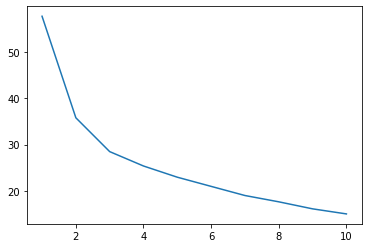

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10,random_state=42)
    kmeans.fit(df_negara)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.show()

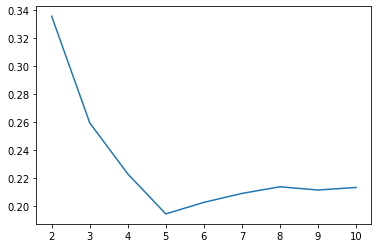

In [32]:
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df_negara)
    ss.append([k, silhouette_score(df_negara, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

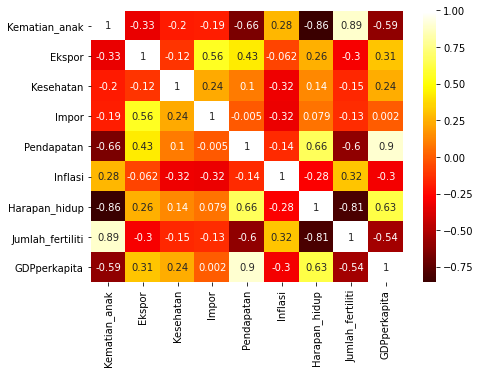

In [20]:
plt.figure(figsize=(7,5))

corrMatrix = df_negara[labels].corr().round(3)

sns.heatmap(corrMatrix, annot = True, center=0, cmap='hot')

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

plt.show()

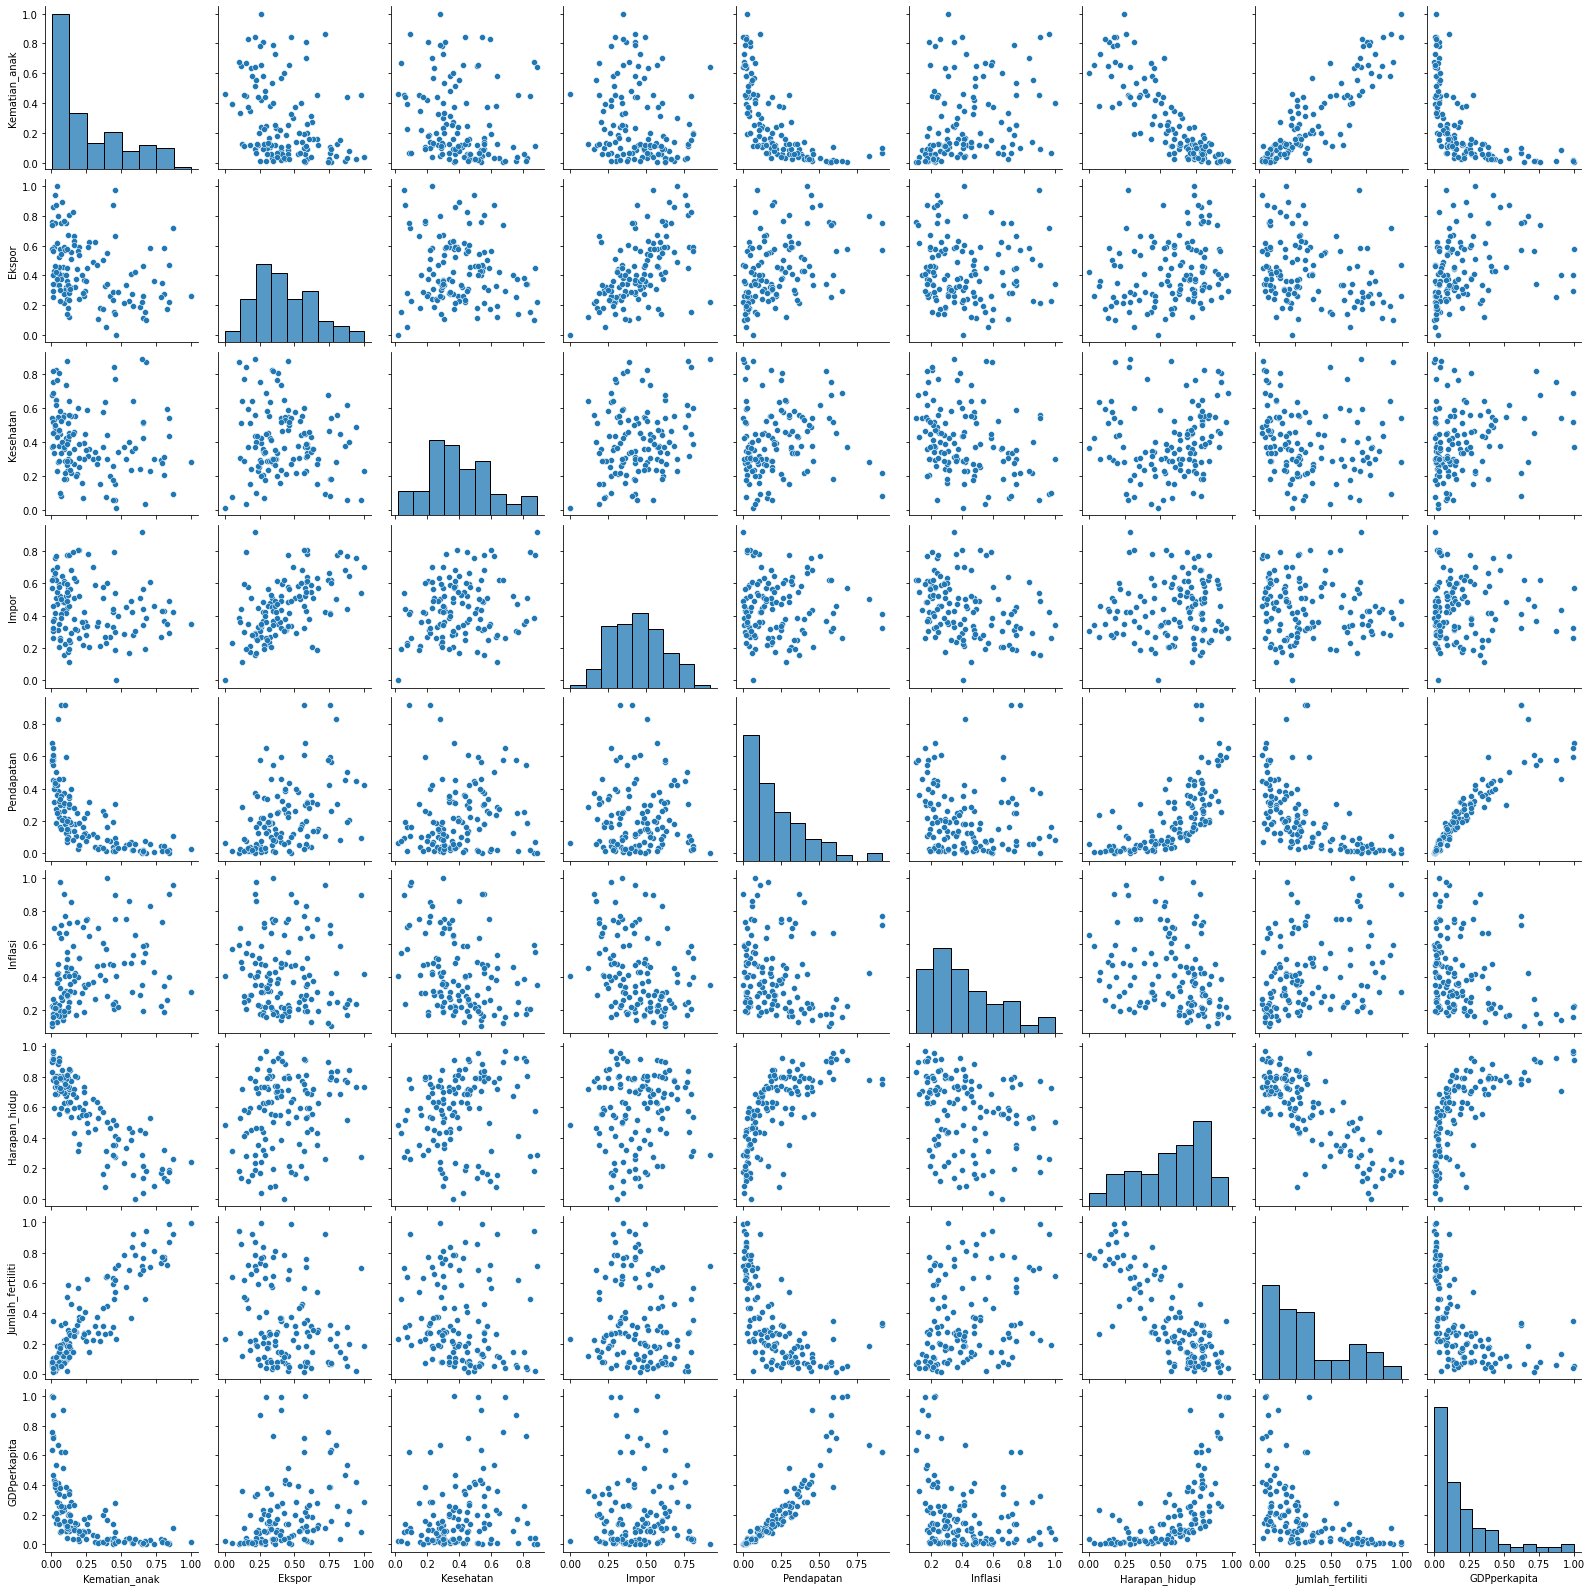

In [21]:
sns.pairplot(data=df_negara)
plt.show()

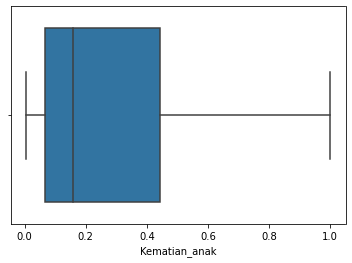

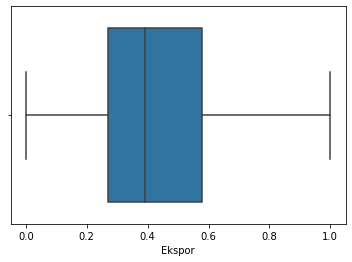

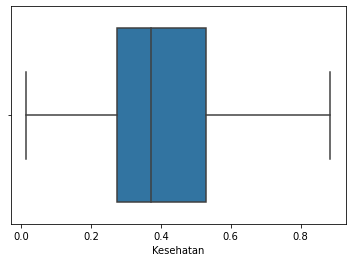

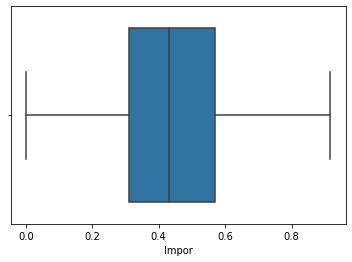

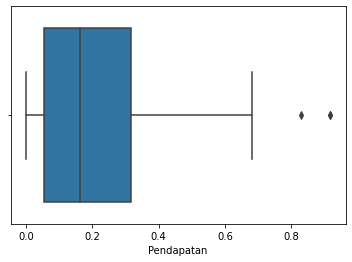

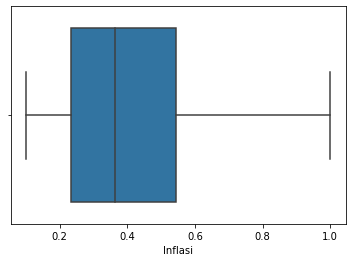

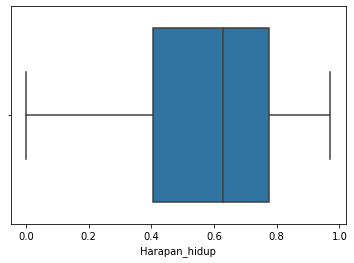

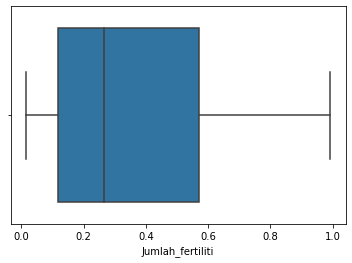

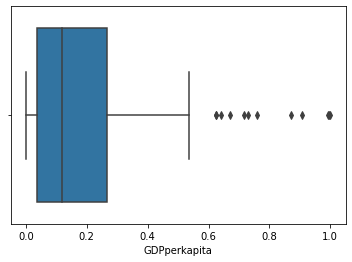

In [22]:
for i,j in enumerate(labels):
    sns.boxplot(data=df_negara, x=labels[i])
    plt.show()

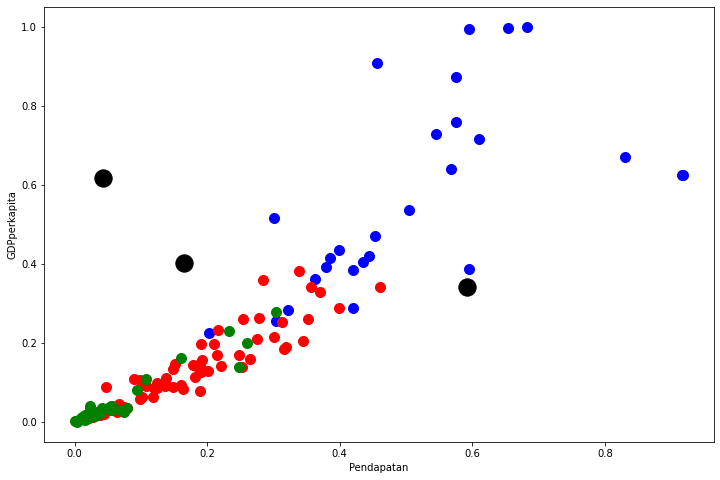

In [23]:
# kmeans = KMeans(n_clusters = 3, random_state=42).fit(df_negara)
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=42).fit(df_negara)
labels = kmeans.labels_
labels

df_negara['label_kmeans'] = labels

plt.figure(figsize=(12,8))

plt.scatter(df_negara['Pendapatan'][df_negara.label_kmeans == 0], df_negara['GDPperkapita'][df_negara.label_kmeans == 0], c='blue', s=100, edgecolor='blue')
plt.scatter(df_negara['Pendapatan'][df_negara.label_kmeans == 1], df_negara['GDPperkapita'][df_negara.label_kmeans == 1], c='red', s=100, edgecolor='red')
plt.scatter(df_negara['Pendapatan'][df_negara.label_kmeans == 2], df_negara['GDPperkapita'][df_negara.label_kmeans == 2], c='green', s=100, edgecolor='green')

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], c='k', s=300)

plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')

plt.show()

In [24]:
df_negara.insert(0,'Negara',df['Negara'])

In [25]:
df_negara.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label_kmeans
0,Afghanistan,0.651786,0.113963,0.511072,0.444192,0.020516,0.490831,0.136364,0.858456,0.010534,2
1,Albania,0.104167,0.321358,0.419841,0.480849,0.191039,0.312837,0.788961,0.091912,0.126239,1
2,Algeria,0.183780,0.441186,0.209035,0.310441,0.251911,0.730313,0.795455,0.319853,0.138343,1
3,Angola,0.866071,0.716560,0.092117,0.424377,0.108442,0.956850,0.262987,0.920956,0.107920,2
4,Antigua and Barbuda,0.057292,0.522992,0.373782,0.582896,0.378984,0.203164,0.805195,0.180147,0.391540,0


In [26]:
top = df_negara[df_negara['label_kmeans']==2].sort_values(by=["GDPperkapita","Pendapatan"], ascending=[True,True])
top = top.reset_index().drop('index',axis=1)
top10 = top.iloc[:10]
top10['Negara'].reset_index().drop('index',axis=1)

,Negara
0,Burundi
1,Liberia
2,"Congo, Dem. Rep."
3,Madagascar
4,Mozambique
5,Malawi
6,Eritrea
7,Togo
8,Guinea-Bissau
9,Afghanistan
